Use Google docs to record at least 200 words on a current matter. You may choose to reveal your true opinion, or you may play the role of an intentionally opinionated person.

Here are some issues that you may consider:

1. Whether durians should be allowed in the MRT.
2. Is Donald Trump doing a good job as President of USA?
3. Is this a good class that you have taken?

After this, some of you will have to clean up the data manually.

After cleaning, use TextBlob to analyse the general opinion of this class regarding this issue.

Are most opinions subjective or factual? Create a scatter plot of these points and comment on it.

In [368]:
import numpy as np
import nltk, textblob

from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn import metrics, datasets, preprocessing

import scipy.stats as stats

In [369]:
file_list = [ 'a0170237l_M_local.txt','a0140538j_M_local.txt','A0155389N_M_local.txt','44638582_M_not_local.txt'
          ,'A0193802E_F_non_local.txt','A0138371E_F_local.txt','A0143163N_F_not_local.txt','A0193810H_F_non_local.txt'
          ,'A0139390B_M_local.txt'
          ,'A0193805Y_F_non_local.txt'
         ,]
file_list = ['../../dsa1361_class/sentiment/'+ x for x in file_list]
        

In [370]:
f2=[]

In [371]:
for files in file_list:
    with open(files) as ff:
        f2.append(TextBlob(ff.read()))

In [372]:
f2[0].sentiment

Sentiment(polarity=0.12492559523809524, subjectivity=0.38333333333333336)

In [373]:
Subjectivity = [x.sentiment[0] for x in f2]
Polarity = [x.sentiment[1] for x in f2]

In [374]:
Subjectivity

[0.12492559523809524,
 0.02248168498168498,
 0.06980943892708596,
 0.10952380952380951,
 0.09632616487455199,
 0.1215909090909091,
 0.17038461538461538,
 0.11151695526695528,
 -0.012500000000000011,
 0.15888278388278387]

In [375]:
Polarity

[0.38333333333333336,
 0.6583791208791209,
 0.4915138782785841,
 0.46468253968253975,
 0.3629800307219662,
 0.4306818181818182,
 0.5932051282051282,
 0.44123376623376626,
 0.775,
 0.5508241758241759]

In [376]:
Gender=['M','M','M','M','F','F','F','F','M','F'] 

In [377]:
Nationality=['l','l','l','nl','nl','l','nl','nl','l','nl']

In [378]:
%matplotlib inline
df = pd.DataFrame ({'Subjectivity':Subjectivity,'Polarity':Polarity,'Gender':Gender,'Nation': Nationality})

In [379]:
df

,Gender,Nation,Polarity,Subjectivity
0,M,l,0.383333,0.124926
1,M,l,0.658379,0.022482
2,M,l,0.491514,0.069809
3,M,nl,0.464683,0.109524
4,F,nl,0.362980,0.096326
5,F,l,0.430682,0.121591
6,F,nl,0.593205,0.170385
7,F,nl,0.441234,0.111517
8,M,l,0.775000,-0.012500
9,F,nl,0.550824,0.158883


In [380]:
df.describe()

,Polarity,Subjectivity
count,10.000000,10.000000
mean,0.515183,0.097294
std,0.129802,0.057008
min,0.362980,-0.012500
25%,0.433320,0.076439
50%,0.478098,0.110520
75%,0.582610,0.124092
max,0.775000,0.170385


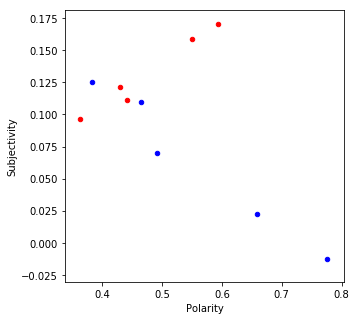

In [381]:
ax1 = df[df.Gender == 'M'].plot(x='Polarity', y='Subjectivity', kind='scatter',color='blue',figsize=(5,5))
df[df.Gender == 'F'].plot(x='Polarity',y='Subjectivity',kind='scatter',color='red',ax=ax1)

In [382]:
# Assess my language style with a local male.
raw_my = ["I am opposed to this proposal. Because if government of Singapore approved this, it would likely to be unequal for others who are males and have to serve the army. As far as I am concerned, this may causes social discontent towards Ben Davis, and as a consequence, his sports career may be permanently stained to certain degree. So, there should be a tradeoff for Ben to consider. Whether the benefits of postponing this service overshadow the harm it imposed on his long-term career? Maybe he can realize fast promotion in recent years since he captures the opportunity; it is absolutely possible that it does not last long. Moreover, as a citizen in Singapore, he ought to think more about his country, instead of focusing too much on his own interests and so on, not to mention that this army service is part of the law. On the other hand, should government approve such proposal? If it does so, it may lose its credits towards the vast majority of the people, considering that Ben's excuse is nothing about health but personal interests. Admittedly, ones should pay attention to her own benefits under most circumstances, especially in areas like business, etc. Still, when confronted with law or social regulations that apply to most of other people, Ben should think it again. However, when we think more about it, we may ask whether it is necessary that the government of Singapore enforce this army service? More topics can be discussed under this question."]

In [383]:
vec1 = CountVectorizer()
out = vec1.fit_transform(raw_my)
out

<1x139 sparse matrix of type '<class 'numpy.int64'>'
	with 139 stored elements in Compressed Sparse Row format>

In [384]:
vec1 = CountVectorizer()
vec1.fit(raw_my)
vec1.transform(raw_my)

<1x139 sparse matrix of type '<class 'numpy.int64'>'
	with 139 stored elements in Compressed Sparse Row format>

In [385]:
out.toarray()[0]

array([3, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 3, 4, 1, 1, 4, 1, 4, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 3, 1, 1, 1, 3, 1, 1, 4, 1, 2, 1, 3, 1, 2, 4, 9, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 4, 1, 1, 3, 1, 2, 1, 1, 2, 1, 7, 4, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 4,
       1, 3, 3, 2, 1, 1, 1, 1, 1, 5, 9, 1, 3, 7, 9, 1, 1, 2, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 1], dtype=int64)

In [386]:
vec1.get_feature_names()

['about',
 'absolutely',
 'admittedly',
 'again',
 'am',
 'and',
 'apply',
 'approve',
 'approved',
 'are',
 'areas',
 'army',
 'as',
 'ask',
 'attention',
 'be',
 'because',
 'ben',
 'benefits',
 'business',
 'but',
 'can',
 'captures',
 'career',
 'causes',
 'certain',
 'circumstances',
 'citizen',
 'concerned',
 'confronted',
 'consequence',
 'consider',
 'considering',
 'country',
 'credits',
 'davis',
 'degree',
 'discontent',
 'discussed',
 'does',
 'enforce',
 'especially',
 'etc',
 'excuse',
 'far',
 'fast',
 'focusing',
 'for',
 'government',
 'hand',
 'harm',
 'have',
 'he',
 'health',
 'her',
 'his',
 'however',
 'if',
 'imposed',
 'in',
 'instead',
 'interests',
 'is',
 'it',
 'its',
 'last',
 'law',
 'like',
 'likely',
 'long',
 'lose',
 'majority',
 'males',
 'may',
 'maybe',
 'mention',
 'more',
 'moreover',
 'most',
 'much',
 'necessary',
 'not',
 'nothing',
 'of',
 'on',
 'ones',
 'opportunity',
 'opposed',
 'or',
 'other',
 'others',
 'ought',
 'overshadow',
 'own',
 

In [387]:
vec1.vocabulary_

{'about': 0,
 'absolutely': 1,
 'admittedly': 2,
 'again': 3,
 'am': 4,
 'and': 5,
 'apply': 6,
 'approve': 7,
 'approved': 8,
 'are': 9,
 'areas': 10,
 'army': 11,
 'as': 12,
 'ask': 13,
 'attention': 14,
 'be': 15,
 'because': 16,
 'ben': 17,
 'benefits': 18,
 'business': 19,
 'but': 20,
 'can': 21,
 'captures': 22,
 'career': 23,
 'causes': 24,
 'certain': 25,
 'circumstances': 26,
 'citizen': 27,
 'concerned': 28,
 'confronted': 29,
 'consequence': 30,
 'consider': 31,
 'considering': 32,
 'country': 33,
 'credits': 34,
 'davis': 35,
 'degree': 36,
 'discontent': 37,
 'discussed': 38,
 'does': 39,
 'enforce': 40,
 'especially': 41,
 'etc': 42,
 'excuse': 43,
 'far': 44,
 'fast': 45,
 'focusing': 46,
 'for': 47,
 'government': 48,
 'hand': 49,
 'harm': 50,
 'have': 51,
 'he': 52,
 'health': 53,
 'her': 54,
 'his': 55,
 'however': 56,
 'if': 57,
 'imposed': 58,
 'in': 59,
 'instead': 60,
 'interests': 61,
 'is': 62,
 'it': 63,
 'its': 64,
 'last': 65,
 'law': 66,
 'like': 67,
 'likel

In [388]:
tfer = TfidfVectorizer()
out2 = tfer.fit_transform(raw_my)
out2.toarray()[0]

array([0.1079025, 0.0359675, 0.0359675, 0.0359675, 0.071935 , 0.1079025,
       0.0359675, 0.0359675, 0.0359675, 0.0359675, 0.0359675, 0.1079025,
       0.14387  , 0.0359675, 0.0359675, 0.14387  , 0.0359675, 0.14387  ,
       0.071935 , 0.0359675, 0.0359675, 0.071935 , 0.0359675, 0.071935 ,
       0.0359675, 0.0359675, 0.0359675, 0.0359675, 0.0359675, 0.0359675,
       0.0359675, 0.0359675, 0.0359675, 0.0359675, 0.0359675, 0.0359675,
       0.0359675, 0.0359675, 0.0359675, 0.071935 , 0.0359675, 0.0359675,
       0.0359675, 0.0359675, 0.0359675, 0.0359675, 0.0359675, 0.071935 ,
       0.1079025, 0.0359675, 0.0359675, 0.0359675, 0.1079025, 0.0359675,
       0.0359675, 0.14387  , 0.0359675, 0.071935 , 0.0359675, 0.1079025,
       0.0359675, 0.071935 , 0.14387  , 0.3237075, 0.0359675, 0.0359675,
       0.071935 , 0.0359675, 0.0359675, 0.071935 , 0.0359675, 0.0359675,
       0.0359675, 0.14387  , 0.0359675, 0.0359675, 0.1079025, 0.0359675,
       0.071935 , 0.0359675, 0.0359675, 0.071935 , 

In [389]:
tfer_ng = TfidfVectorizer(ngram_range=(1,2))
# also have two words.
out3 = tfer_ng.fit_transform(raw_my)
tfer_ng.get_feature_names()

['about',
 'about health',
 'about his',
 'about it',
 'absolutely',
 'absolutely possible',
 'admittedly',
 'admittedly ones',
 'again',
 'again however',
 'am',
 'am concerned',
 'am opposed',
 'and',
 'and as',
 'and have',
 'and so',
 'apply',
 'apply to',
 'approve',
 'approve such',
 'approved',
 'approved this',
 'are',
 'are males',
 'areas',
 'areas like',
 'army',
 'army as',
 'army service',
 'as',
 'as am',
 'as citizen',
 'as consequence',
 'as far',
 'ask',
 'ask whether',
 'attention',
 'attention to',
 'be',
 'be discussed',
 'be permanently',
 'be tradeoff',
 'be unequal',
 'because',
 'because if',
 'ben',
 'ben davis',
 'ben excuse',
 'ben should',
 'ben to',
 'benefits',
 'benefits of',
 'benefits under',
 'business',
 'business etc',
 'but',
 'but personal',
 'can',
 'can be',
 'can realize',
 'captures',
 'captures the',
 'career',
 'career may',
 'career maybe',
 'causes',
 'causes social',
 'certain',
 'certain degree',
 'circumstances',
 'circumstances especial

In [390]:
# Randomly select one local male.

In [391]:
raw_lm = ["Ben Davis should not be allowed to defer National Service as it constitutes the foundation of Singapore's defence. Although the size of the Singapore Armed Forces is not in danger of shrinking and more females are getting inspired to serve the country, earning a living as a sportsman is, at its highest levels, a risk at every junction. Joseph Schooling, being the first Singaporean to win a gold medal at the Olympic Games, could be considered an exception, but the footballer Ben Davis is requires long periods of training and trying out at different clubs before any measure of success can be expected, time that would be better served learning how to defend against attacks, both real and online. In addition, football has been brought into disrepute recently with FIFA, Russia and the World Cup being clouded in a shadow of human rights abuses, wasted money and treatment of fans as compared to players. Although some level of corruption has been removed from the global game, including the infamous hooligan incidents of English and other domains, such removal has created nothing but a sterilised environment not maellable into an inclusive experience for everyone involved, as compared to more introverted and mindful activities like drawing and writing. Returning to National Service, there are a good number of benefits given to actively serving personnel as reward for their work, but very little compensation of the same kind for athletes. In short, Ben Davis should not sacrifice the good life he already has locally for a wandering career across the whole untrusted Earth."]

In [392]:
vec1 = CountVectorizer()
out = vec1.fit_transform(raw_lm)
out

<1x173 sparse matrix of type '<class 'numpy.int64'>'
	with 173 stored elements in Compressed Sparse Row format>

In [393]:
vec1 = CountVectorizer()
vec1.fit(raw_lm)
vec1.transform(raw_lm)

<1x173 sparse matrix of type '<class 'numpy.int64'>'
	with 173 stored elements in Compressed Sparse Row format>

In [394]:
out.toarray()[0]

array([ 1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  8,  1,  2,  1,  5,  4,  1,
        1,  4,  2,  1,  2,  3,  1,  1,  1,  1,  3,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  4,  1,  1,  1,  1,  1,  4,  1,  1,
        1,  1,  1,  2,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  4,  1,  1, 11,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  1,  1,  1,  2,  1,  2,  1,  1,  1,  1,  1,  1,  1,
        1, 13,  1,  1,  1,  8,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1], dtype=int64)

In [395]:
vec1.get_feature_names()

['abuses',
 'across',
 'actively',
 'activities',
 'addition',
 'against',
 'allowed',
 'already',
 'although',
 'an',
 'and',
 'any',
 'are',
 'armed',
 'as',
 'at',
 'athletes',
 'attacks',
 'be',
 'been',
 'before',
 'being',
 'ben',
 'benefits',
 'better',
 'both',
 'brought',
 'but',
 'can',
 'career',
 'clouded',
 'clubs',
 'compared',
 'compensation',
 'considered',
 'constitutes',
 'corruption',
 'could',
 'country',
 'created',
 'cup',
 'danger',
 'davis',
 'defence',
 'defend',
 'defer',
 'different',
 'disrepute',
 'domains',
 'drawing',
 'earning',
 'earth',
 'english',
 'environment',
 'every',
 'everyone',
 'exception',
 'expected',
 'experience',
 'fans',
 'females',
 'fifa',
 'first',
 'football',
 'footballer',
 'for',
 'forces',
 'foundation',
 'from',
 'game',
 'games',
 'getting',
 'given',
 'global',
 'gold',
 'good',
 'has',
 'he',
 'highest',
 'hooligan',
 'how',
 'human',
 'in',
 'incidents',
 'including',
 'inclusive',
 'infamous',
 'inspired',
 'into',
 'intro

In [396]:
vec1.vocabulary_

{'abuses': 0,
 'across': 1,
 'actively': 2,
 'activities': 3,
 'addition': 4,
 'against': 5,
 'allowed': 6,
 'already': 7,
 'although': 8,
 'an': 9,
 'and': 10,
 'any': 11,
 'are': 12,
 'armed': 13,
 'as': 14,
 'at': 15,
 'athletes': 16,
 'attacks': 17,
 'be': 18,
 'been': 19,
 'before': 20,
 'being': 21,
 'ben': 22,
 'benefits': 23,
 'better': 24,
 'both': 25,
 'brought': 26,
 'but': 27,
 'can': 28,
 'career': 29,
 'clouded': 30,
 'clubs': 31,
 'compared': 32,
 'compensation': 33,
 'considered': 34,
 'constitutes': 35,
 'corruption': 36,
 'could': 37,
 'country': 38,
 'created': 39,
 'cup': 40,
 'danger': 41,
 'davis': 42,
 'defence': 43,
 'defend': 44,
 'defer': 45,
 'different': 46,
 'disrepute': 47,
 'domains': 48,
 'drawing': 49,
 'earning': 50,
 'earth': 51,
 'english': 52,
 'environment': 53,
 'every': 54,
 'everyone': 55,
 'exception': 56,
 'expected': 57,
 'experience': 58,
 'fans': 59,
 'females': 60,
 'fifa': 61,
 'first': 62,
 'football': 63,
 'footballer': 64,
 'for': 65,


In [397]:
tfer = TfidfVectorizer()
out2 = tfer.fit_transform(raw_lm)
out2.toarray()[0]

array([0.03599079, 0.03599079, 0.03599079, 0.03599079, 0.03599079,
       0.03599079, 0.03599079, 0.03599079, 0.07198158, 0.07198158,
       0.2879263 , 0.03599079, 0.07198158, 0.03599079, 0.17995394,
       0.14396315, 0.03599079, 0.03599079, 0.14396315, 0.07198158,
       0.03599079, 0.07198158, 0.10797236, 0.03599079, 0.03599079,
       0.03599079, 0.03599079, 0.10797236, 0.03599079, 0.03599079,
       0.03599079, 0.03599079, 0.07198158, 0.03599079, 0.03599079,
       0.03599079, 0.03599079, 0.03599079, 0.03599079, 0.03599079,
       0.03599079, 0.03599079, 0.10797236, 0.03599079, 0.03599079,
       0.03599079, 0.03599079, 0.03599079, 0.03599079, 0.03599079,
       0.03599079, 0.03599079, 0.03599079, 0.03599079, 0.03599079,
       0.03599079, 0.03599079, 0.03599079, 0.03599079, 0.03599079,
       0.03599079, 0.03599079, 0.03599079, 0.03599079, 0.03599079,
       0.14396315, 0.03599079, 0.03599079, 0.03599079, 0.03599079,
       0.03599079, 0.03599079, 0.03599079, 0.03599079, 0.03599

In [398]:
tfer_ng = TfidfVectorizer(ngram_range=(1,2))
# also have two words.
out3 = tfer_ng.fit_transform(raw_lm)
tfer_ng.get_feature_names()

['abuses',
 'abuses wasted',
 'across',
 'across the',
 'actively',
 'actively serving',
 'activities',
 'activities like',
 'addition',
 'addition football',
 'against',
 'against attacks',
 'allowed',
 'allowed to',
 'already',
 'already has',
 'although',
 'although some',
 'although the',
 'an',
 'an exception',
 'an inclusive',
 'and',
 'and mindful',
 'and more',
 'and online',
 'and other',
 'and the',
 'and treatment',
 'and trying',
 'and writing',
 'any',
 'any measure',
 'are',
 'are getting',
 'are good',
 'armed',
 'armed forces',
 'as',
 'as compared',
 'as it',
 'as reward',
 'as sportsman',
 'at',
 'at different',
 'at every',
 'at its',
 'at the',
 'athletes',
 'athletes in',
 'attacks',
 'attacks both',
 'be',
 'be allowed',
 'be better',
 'be considered',
 'be expected',
 'been',
 'been brought',
 'been removed',
 'before',
 'before any',
 'being',
 'being clouded',
 'being the',
 'ben',
 'ben davis',
 'benefits',
 'benefits given',
 'better',
 'better served',
 'bot

In [399]:
# whether the abstract for a course paper written by me is subjective or polatary

In [400]:
raw_myabs=("The CBOE SKEW, a novel index launched in February 2011, mainly measures tail risk. We follow the instructions in CBOE Whitepaper and derive the Chinese version of SKEW with SSE 50ETF as the underlying. With this SKEW, we conduct comparison analysis between the U.S. and Chinese market, especially during drastic plummet. Basic Empirical results show that in both the U.S. and Chinese market, SKEW is related to the rate of return of the underlying. Cross correlation coefficients identify certain signal of the relationship between SKEW and volatility before the crash happens. We also tentatively construct the Skew and volatility risk premia (SRP and VRP) to explain the risk premia of the underlying asset. Generally, results in both markets correspond to our original intuition: the greedier (fearful) the investor are, the higher (lower) the return. This pattern is extremely explanatory during the 2015 Chinese market crash, and hence this paper highlights the necessity of introducing the SKEW indicator into Chinese market. ")

In [401]:
doc1 = ("The CBOE SKEW, a novel index launched in February 2011, mainly measures tail risk. We follow the instructions in CBOE Whitepaper and derive the Chinese version of SKEW with SSE 50ETF as the underlying. With this SKEW, we conduct comparison analysis between the U.S. and Chinese market, especially during drastic plummet. Basic Empirical results show that in both the U.S. and Chinese market, SKEW is related to the rate of return of the underlying. Cross correlation coefficients identify certain signal of the relationship between SKEW and volatility before the crash happens. We also tentatively construct the Skew and volatility risk premia (SRP and VRP) to explain the risk premia of the underlying asset. Generally, results in both markets correspond to our original intuition: the greedier (fearful) the investor are, the higher (lower) the return. This pattern is extremely explanatory during the 2015 Chinese market crash, and hence this paper highlights the necessity of introducing the SKEW indicator into Chinese market. ")
blob = TextBlob(doc1)

In [402]:
blob.sentences[1]

Sentence("We follow the instructions in CBOE Whitepaper and derive the Chinese version of SKEW with SSE 50ETF as the underlying.")

In [403]:
print(blob.sentences)
for words in blob.sentences[0].words:
    print (words)

[Sentence("The CBOE SKEW, a novel index launched in February 2011, mainly measures tail risk."), Sentence("We follow the instructions in CBOE Whitepaper and derive the Chinese version of SKEW with SSE 50ETF as the underlying."), Sentence("With this SKEW, we conduct comparison analysis between the U.S. and Chinese market, especially during drastic plummet."), Sentence("Basic Empirical results show that in both the U.S. and Chinese market, SKEW is related to the rate of return of the underlying."), Sentence("Cross correlation coefficients identify certain signal of the relationship between SKEW and volatility before the crash happens."), Sentence("We also tentatively construct the Skew and volatility risk premia (SRP and VRP) to explain the risk premia of the underlying asset."), Sentence("Generally, results in both markets correspond to our original intuition: the greedier (fearful) the investor are, the higher (lower) the return."), Sentence("This pattern is extremely explanatory durin

In [404]:
for np in blob.noun_phrases:
    print (np)

cboe skew
novel index
february
measures tail risk
cboe whitepaper
chinese version
skew
sse
skew
conduct comparison analysis
u.s.
chinese market
drastic plummet
empirical
u.s.
chinese market
skew
cross correlation coefficients identify
certain signal
skew
skew
volatility risk premia
srp
vrp
risk premia
markets correspond
original intuition
chinese market crash
paper highlights
skew
chinese market


In [405]:
print (blob.sentences[3].words[2])
print (blob.sentences[3].words[2].singularize())
print (blob.sentences[4].words[1])
print (blob.sentences[4].words[1].pluralize())

results
result
correlation
correlations


In [406]:
blob.sentiment

Sentiment(polarity=0.007703081232492996, subjectivity=0.3693977591036415)

In [407]:
# So this abstract of mine might not be polary, but it is kind of subjective, which should be avoided in academic research.

In [408]:
# Maybe there are too many "We"? So I change "We" into "they".

In [409]:
doc2=("The CBOE SKEW, a novel index launched in February 2011, mainly measures tail risk. They follow the instructions in CBOE Whitepaper and derive the Chinese version of SKEW with SSE 50ETF as the underlying. With this SKEW, they conduct comparison analysis between the U.S. and Chinese market, especially during drastic plummet. Basic Empirical results show that in both the U.S. and Chinese market, SKEW is related to the rate of return of the underlying. Cross correlation coefficients identify certain signal of the relationship between SKEW and volatility before the crash happens. They also tentatively construct the Skew and volatility risk premia (SRP and VRP) to explain the risk premia of the underlying asset. Generally, results in both markets correspond to our original intuition: the greedier (fearful) the investor are, the higher (lower) the return. This pattern is extremely explanatory during the 2015 Chinese market crash, and hence this paper highlights the necessity of introducing the SKEW indicator into Chinese market.")

In [410]:
blob2 = TextBlob(doc2)

In [411]:
blob2.sentiment

Sentiment(polarity=0.007703081232492996, subjectivity=0.3693977591036415)

In [412]:
#There is no difference.